In [7]:
import numpy as np
import matplotlib.pyplot as plt

from utils import likelihood, multivariate_normal, gmm


In [2]:
xs = np.loadtxt('data/old_faithful.txt')
print(xs.shape)

(272, 2)


In [4]:
# パラメータ (初期値)
phis = np.array([0.5, 0.5])
mus = np.array([[0.0, 50.0], [0.0, 100.0]])
covs = np.array([np.eye(2), np.eye(2)])  # np.eye(2)は単位行列を生成


In [5]:
K = len(phis)
N = len(xs)
MAX_ITERS = 100
THRESHOLD = 1e-4

In [11]:
current_likelihood = likelihood(xs, phis, mus, covs)

for iter in range(MAX_ITERS):
    # E-step
    qs = np.zeros((N, K))
    for n in range(N):
        x = xs[n]
        for k in range(K):
            phi, mu, cov = phis[k], mus[k], covs[k]
            qs[n, k] = phi * multivariate_normal(x, mu, cov)
        qs[n] /= gmm(x, phis, mus, covs)

    # M-step
    qs_sum = qs.sum(axis=0)
    for k in range(K):
        # 1. phis
        phis[k] = qs_sum[k] / N

        # 2. mus
        c = 0
        for n in range(N):
            c += qs[n, k] * xs[n]
        mus[k] = c / qs_sum[k]

        # 3. covs
        c = 0
        for n in range(N):
            z = xs[n] - mus[k]
            z = z[:, np.newaxis]
            c += qs[n, k]* z @ z.T
        covs[k] = c / qs_sum[k]

    # 終了判定
    print(f'{current_likelihood: .3f}')

    next_likelihood = likelihood(xs, phis, mus, covs)
    diff = np.abs(next_likelihood - current_likelihood)
    if diff < THRESHOLD:
        break
    current_likelihood = next_likelihood


-16.538
-4.415
-4.357
-4.302
-4.245
-4.200
-4.164
-4.156
-4.155


In [12]:
N = 500
new_xs = np.zeros((N, 2))
for n in range(N):
    k = np.random.choice(2, p=phis)
    mu, cov = mus[k], covs[k]
    new_xs[n] = np.random.multivariate_normal(mu, cov)

(50,) (60,)


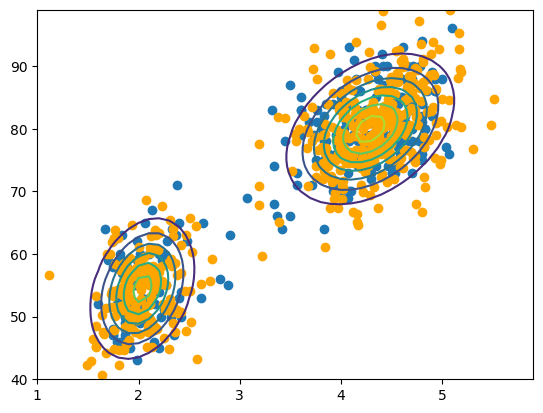

In [22]:
x = np.arange(1, 6, 0.1)
y = np.arange(40, 100, 1)
print(x.shape, y.shape)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i, j], Y[i, j]])
        Z[i, j] = gmm(x, phis, mus, covs)

plt.contour(X, Y, Z)
plt.scatter(xs[:, 0], xs[:, 1])
plt.scatter(new_xs[:, 0], new_xs[:, 1], color='orange')
plt.show()